# Решение домашнего задания по машинному обучению 2023

# Иванов Тимофей 5030103/00301

Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

Читаем данные

## Чтение и кодирование данных

In [2]:
df = pd.read_json('data.json')
df

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


Сделаем кодирование колонки "ингридиенты" следующим образом:
Добавим все ингридиенты в один список и возьмём только уникальные, эти ингридиенты будут названиями колонок.
Если ингридиент есть, то в соответсвующей колонке поставим значение 1, если нет то поставим значение 0.

In [3]:
all_ingredients = []
for element in df['ingredients'].values:
    all_ingredients.extend(element)
all_ingredients = list(set(all_ingredients))

In [4]:
df.loc[:, all_ingredients] = 0

In [5]:
df

,id,cuisine,ingredients,whole cloves,Pale Ale,frozen petit pois,grain alcohol,sichuanese chili paste,fresh yeast,salt,...,Domino Light Brown Sugar,kefalotyri,pear tomatoes,bottom round roast,boiled eggs,flowering garlic chives,fruitcake,edible gold leaf,medium eggs,frozen popcorn chicken
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,"[water, vegetable oil, wheat, salt]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
for i, element in enumerate(df['ingredients']):
    for ingredient in element:
        df.loc[i, ingredient] = 1

In [7]:
df

,id,cuisine,ingredients,whole cloves,Pale Ale,frozen petit pois,grain alcohol,sichuanese chili paste,fresh yeast,salt,...,Domino Light Brown Sugar,kefalotyri,pear tomatoes,bottom round roast,boiled eggs,flowering garlic chives,fruitcake,edible gold leaf,medium eggs,frozen popcorn chicken
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,"[water, vegetable oil, wheat, salt]",0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Выкинем колонку ingredients (так как мы сделали кодировку)

In [8]:
df.drop(columns='ingredients', inplace=True)

In [9]:
df

,id,cuisine,whole cloves,Pale Ale,frozen petit pois,grain alcohol,sichuanese chili paste,fresh yeast,salt,flour tortillas (not low fat),...,Domino Light Brown Sugar,kefalotyri,pear tomatoes,bottom round roast,boiled eggs,flowering garlic chives,fruitcake,edible gold leaf,medium eggs,frozen popcorn chicken
0,10259,greek,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,irish,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
39770,11462,italian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,2238,irish,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
39772,41882,chinese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Теперь можно сделать исследования 

## Анализ данных

Для начала, мы можем посмотреть распределение кухонь мира
Это можно сделать элементарно с помощью библиотеки seaborn 

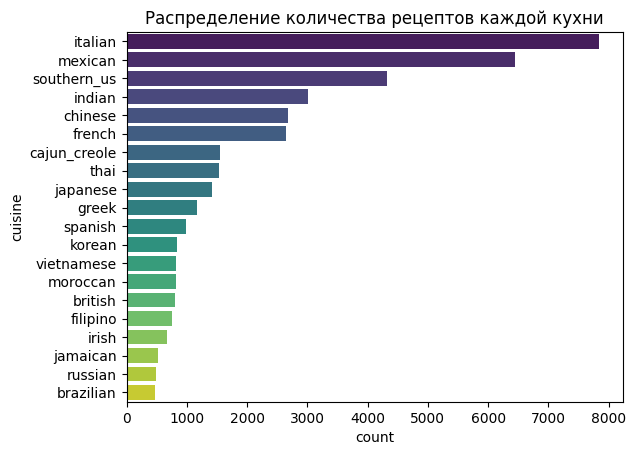

In [10]:
plt.title('Распределение количества рецептов каждой кухни')
sns.countplot(df, y='cuisine', order=df['cuisine'].value_counts().index, palette="viridis");

Нетрудно заметить, что распределение отличается от равномерного.\
Держим в голове, что это надо учесть при формировании тренировочной и тестовой выборки

Также найдем самые частовстречающиеся ингридиенты в каждой кухне.

Итальянская кухня

In [11]:
italian_ingredients = df[df['cuisine'] == 'italian']\
    .drop(columns=['id', 'cuisine'])\
    .sum(axis=0)\
    .sort_values(ascending=False)\
    .head(10)\
    .reset_index()\
    .rename(columns={'index': 'ingredient', 0: 'appereance_times'})
italian_ingredients

,ingredient,appereance_times
0,salt,3454
1,olive oil,3111
2,garlic cloves,1619
3,grated parmesan cheese,1579
4,garlic,1471
5,ground black pepper,1444
6,extra-virgin olive oil,1362
7,onions,1240
8,water,1052
9,butter,1029


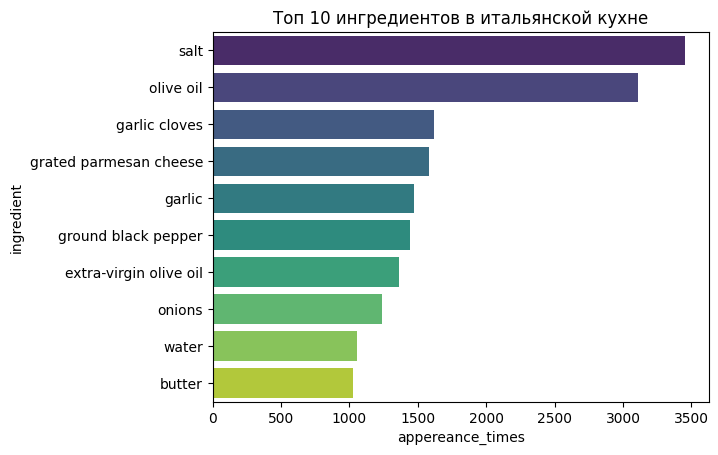

In [12]:
plt.title('Топ 10 ингредиентов в итальянской кухне')
sns.barplot(data=italian_ingredients, x='appereance_times', y='ingredient', palette='viridis');

Мексиканская кухня

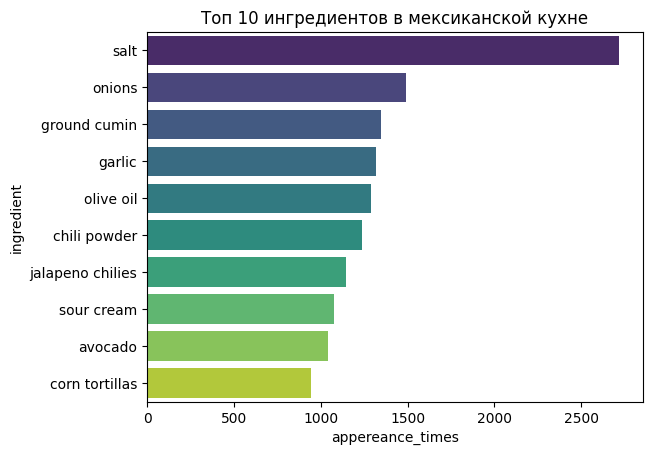

In [13]:
mexican_ingredients = df[df['cuisine'] == 'mexican']\
    .drop(columns=['id', 'cuisine'])\
    .sum(axis=0)\
    .sort_values(ascending=False)\
    .head(10)\
    .reset_index()\
    .rename(columns={'index': 'ingredient', 0: 'appereance_times'})
plt.title('Топ 10 ингредиентов в мексиканской кухне')
sns.barplot(data=mexican_ingredients, x='appereance_times', y='ingredient', palette='viridis');

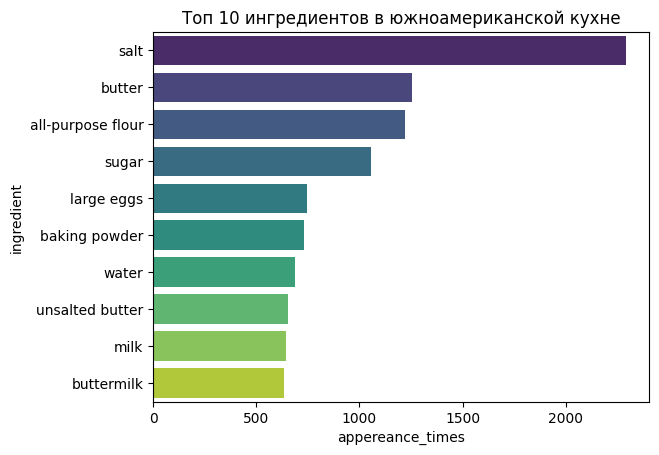

In [14]:
southern_us_ingredients = df[df['cuisine'] == 'southern_us']\
    .drop(columns=['id', 'cuisine'])\
    .sum(axis=0)\
    .sort_values(ascending=False)\
    .head(10)\
    .reset_index()\
    .rename(columns={'index': 'ingredient', 0: 'appereance_times'})
plt.title('Топ 10 ингредиентов в южноамериканской кухне')
sns.barplot(data=southern_us_ingredients, x='appereance_times', y='ingredient', palette='viridis');

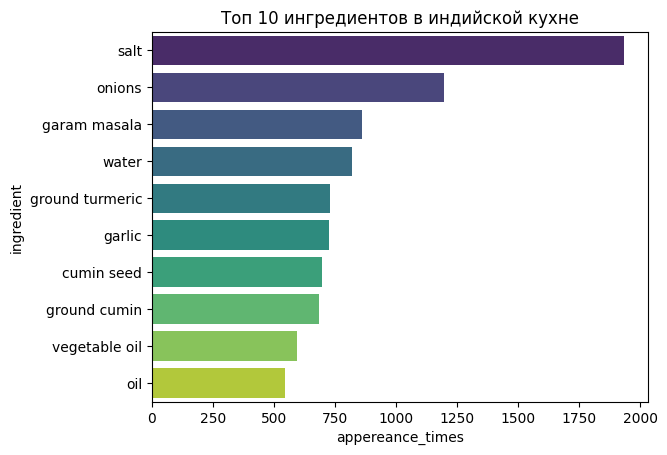

In [15]:
indian_ingredients = df[df['cuisine'] == 'indian']\
    .drop(columns=['id', 'cuisine'])\
    .sum(axis=0)\
    .sort_values(ascending=False)\
    .head(10)\
    .reset_index()\
    .rename(columns={'index': 'ingredient', 0: 'appereance_times'})
plt.title('Топ 10 ингредиентов в индийской кухне')
sns.barplot(data=indian_ingredients, x='appereance_times', y='ingredient', palette='viridis');

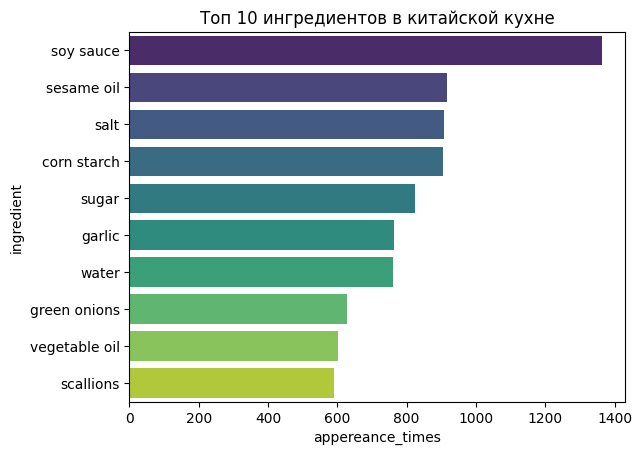

In [16]:
chinese_ingredients = df[df['cuisine'] == 'chinese']\
    .drop(columns=['id', 'cuisine'])\
    .sum(axis=0)\
    .sort_values(ascending=False)\
    .head(10)\
    .reset_index()\
    .rename(columns={'index': 'ingredient', 0: 'appereance_times'})
plt.title('Топ 10 ингредиентов в китайской кухне')
sns.barplot(data=chinese_ingredients, x='appereance_times', y='ingredient', palette='viridis');

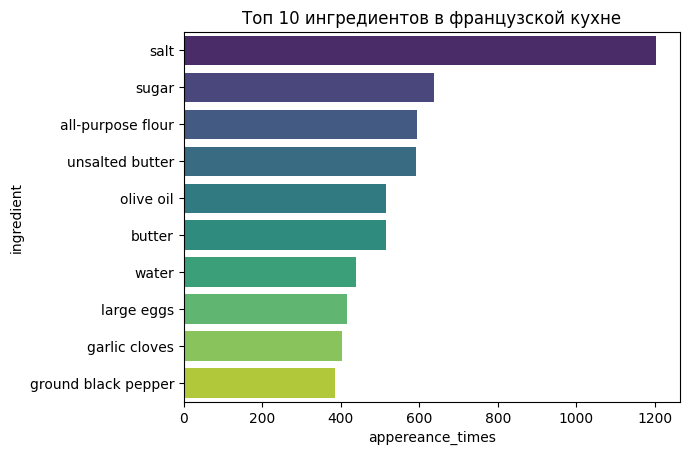

In [17]:
french_ingredients = df[df['cuisine'] == 'french']\
    .drop(columns=['id', 'cuisine'])\
    .sum(axis=0)\
    .sort_values(ascending=False)\
    .head(10)\
    .reset_index()\
    .rename(columns={'index': 'ingredient', 0: 'appereance_times'})
plt.title('Топ 10 ингредиентов в французской кухне')
sns.barplot(data=french_ingredients, x='appereance_times', y='ingredient', palette='viridis');

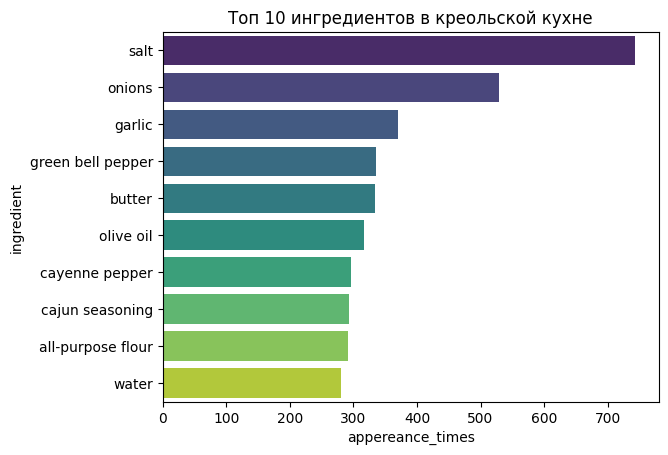

In [18]:
cajun_ingredients = df[df['cuisine'] == 'cajun_creole']\
    .drop(columns=['id', 'cuisine'])\
    .sum(axis=0)\
    .sort_values(ascending=False)\
    .head(10)\
    .reset_index()\
    .rename(columns={'index': 'ingredient', 0: 'appereance_times'})
plt.title('Топ 10 ингредиентов в креольской кухне')
sns.barplot(data=cajun_ingredients, x='appereance_times', y='ingredient', palette='viridis');

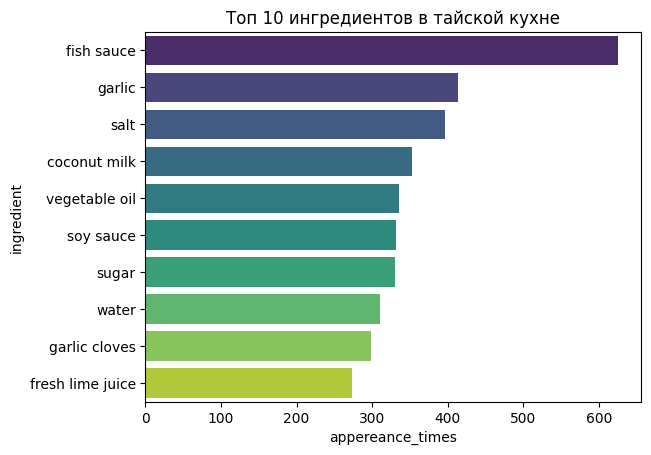

In [19]:
thai_ingredients = df[df['cuisine'] == 'thai']\
    .drop(columns=['id', 'cuisine'])\
    .sum(axis=0)\
    .sort_values(ascending=False)\
    .head(10)\
    .reset_index()\
    .rename(columns={'index': 'ingredient', 0: 'appereance_times'})
plt.title('Топ 10 ингредиентов в тайской кухне')
sns.barplot(data=thai_ingredients, x='appereance_times', y='ingredient', palette='viridis');

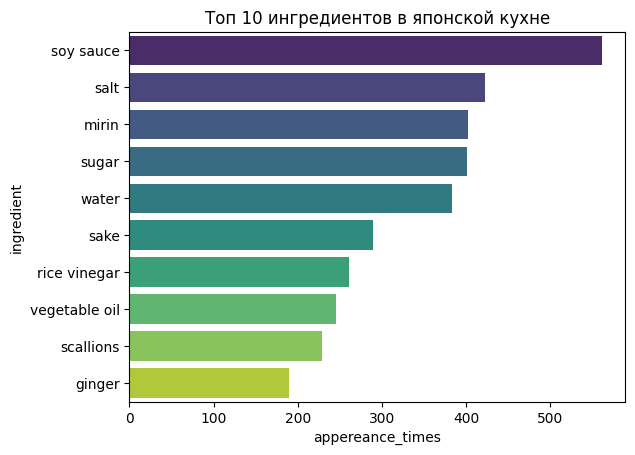

In [20]:
jp_ingredients = df[df['cuisine'] == 'japanese']\
    .drop(columns=['id', 'cuisine'])\
    .sum(axis=0)\
    .sort_values(ascending=False)\
    .head(10)\
    .reset_index()\
    .rename(columns={'index': 'ingredient', 0: 'appereance_times'})
plt.title('Топ 10 ингредиентов в японской кухне')
sns.barplot(data=jp_ingredients, x='appereance_times', y='ingredient', palette='viridis');

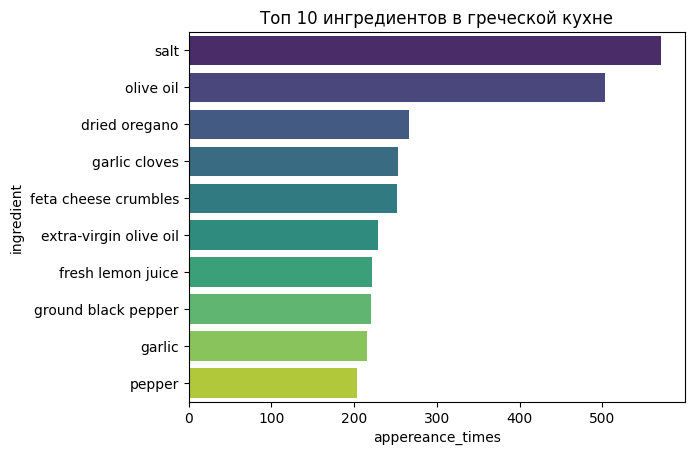

In [21]:
greek_ingredients = df[df['cuisine'] == 'greek']\
    .drop(columns=['id', 'cuisine'])\
    .sum(axis=0)\
    .sort_values(ascending=False)\
    .head(10)\
    .reset_index()\
    .rename(columns={'index': 'ingredient', 0: 'appereance_times'})
plt.title('Топ 10 ингредиентов в греческой кухне')
sns.barplot(data=greek_ingredients, x='appereance_times', y='ingredient', palette='viridis');

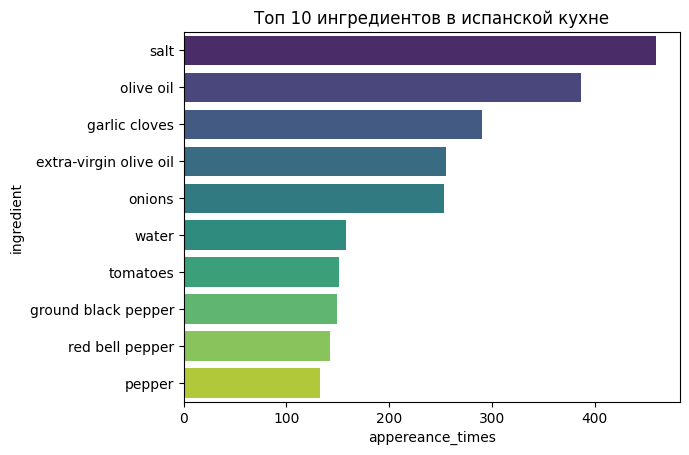

In [22]:
spanish_ingredients = df[df['cuisine'] == 'spanish']\
    .drop(columns=['id', 'cuisine'])\
    .sum(axis=0)\
    .sort_values(ascending=False)\
    .head(10)\
    .reset_index()\
    .rename(columns={'index': 'ingredient', 0: 'appereance_times'})
plt.title('Топ 10 ингредиентов в испанской кухне')
sns.barplot(data=spanish_ingredients, x='appereance_times', y='ingredient', palette='viridis');

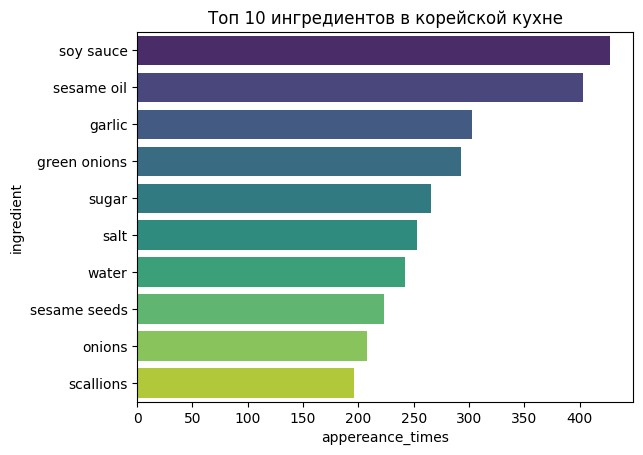

In [23]:
korean_ingredients = df[df['cuisine'] == 'korean']\
    .drop(columns=['id', 'cuisine'])\
    .sum(axis=0)\
    .sort_values(ascending=False)\
    .head(10)\
    .reset_index()\
    .rename(columns={'index': 'ingredient', 0: 'appereance_times'})
plt.title('Топ 10 ингредиентов в корейской кухне')
sns.barplot(data=korean_ingredients, x='appereance_times', y='ingredient', palette='viridis');

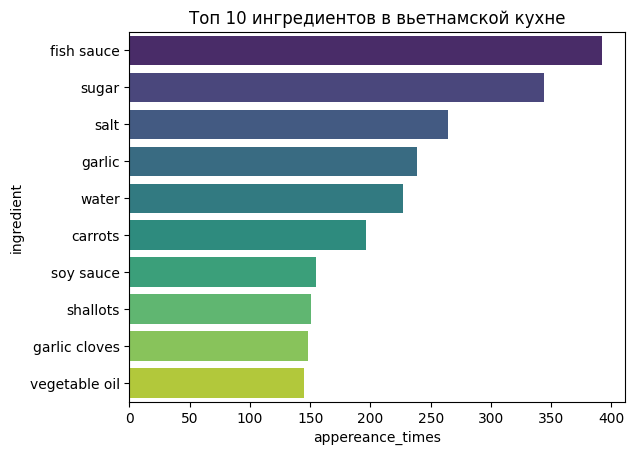

In [24]:
vietnamese_ingredients = df[df['cuisine'] == 'vietnamese']\
    .drop(columns=['id', 'cuisine'])\
    .sum(axis=0)\
    .sort_values(ascending=False)\
    .head(10)\
    .reset_index()\
    .rename(columns={'index': 'ingredient', 0: 'appereance_times'})
plt.title('Топ 10 ингредиентов в вьетнамской кухне')
sns.barplot(data=vietnamese_ingredients, x='appereance_times', y='ingredient', palette='viridis');

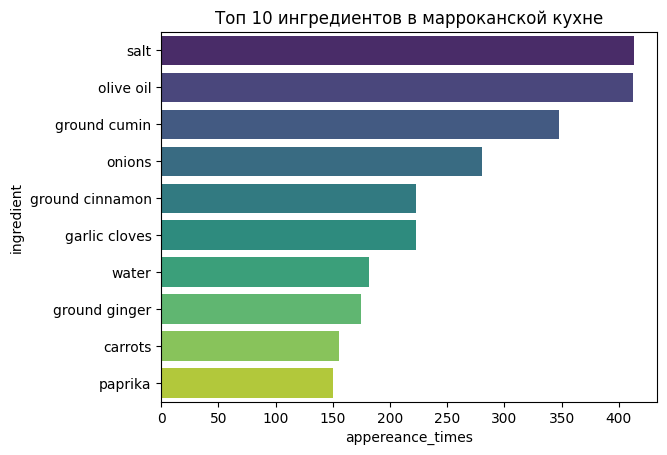

In [25]:
moroccan_ingredients = df[df['cuisine'] == 'moroccan']\
    .drop(columns=['id', 'cuisine'])\
    .sum(axis=0)\
    .sort_values(ascending=False)\
    .head(10)\
    .reset_index()\
    .rename(columns={'index': 'ingredient', 0: 'appereance_times'})
plt.title('Топ 10 ингредиентов в марроканской кухне')
sns.barplot(data=moroccan_ingredients, x='appereance_times', y='ingredient', palette='viridis');

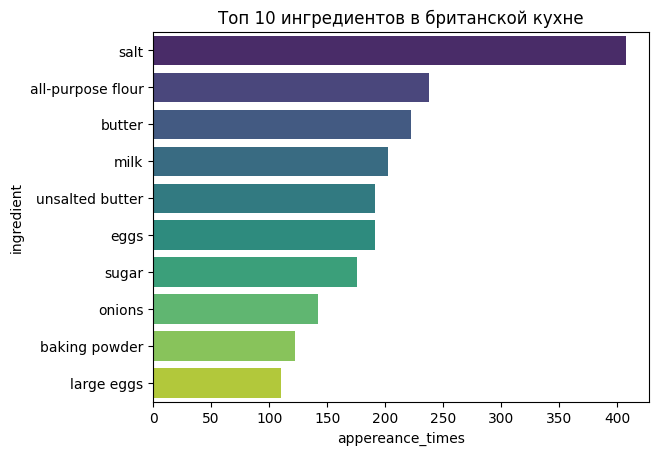

In [26]:
british_ingredients = df[df['cuisine'] == 'british']\
    .drop(columns=['id', 'cuisine'])\
    .sum(axis=0)\
    .sort_values(ascending=False)\
    .head(10)\
    .reset_index()\
    .rename(columns={'index': 'ingredient', 0: 'appereance_times'})
plt.title('Топ 10 ингредиентов в британской кухне')
sns.barplot(data=british_ingredients, x='appereance_times', y='ingredient', palette='viridis');

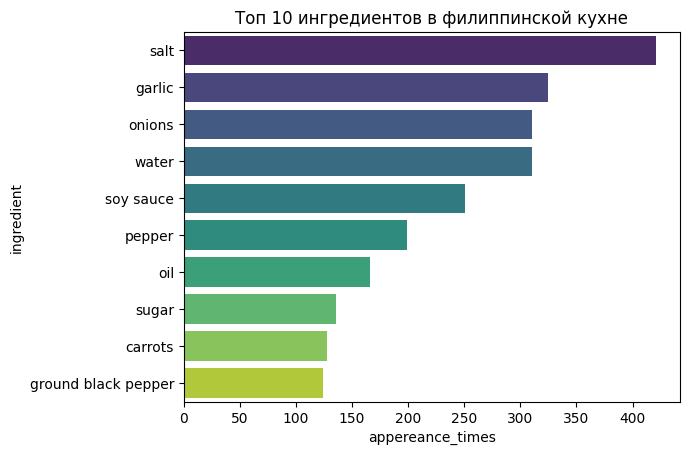

In [27]:
filipino_ingredients = df[df['cuisine'] == 'filipino']\
    .drop(columns=['id', 'cuisine'])\
    .sum(axis=0)\
    .sort_values(ascending=False)\
    .head(10)\
    .reset_index()\
    .rename(columns={'index': 'ingredient', 0: 'appereance_times'})
plt.title('Топ 10 ингредиентов в филиппинской кухне')
sns.barplot(data=filipino_ingredients, x='appereance_times', y='ingredient', palette='viridis');

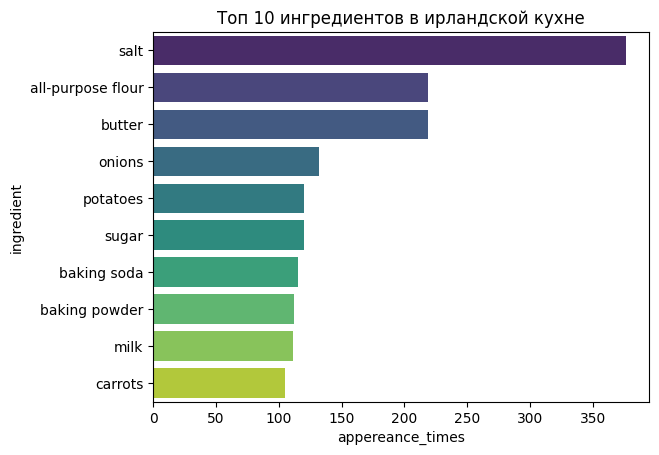

In [28]:
irish_ingredients = df[df['cuisine'] == 'irish']\
    .drop(columns=['id', 'cuisine'])\
    .sum(axis=0)\
    .sort_values(ascending=False)\
    .head(10)\
    .reset_index()\
    .rename(columns={'index': 'ingredient', 0: 'appereance_times'})
plt.title('Топ 10 ингредиентов в ирландской кухне')
sns.barplot(data=irish_ingredients, x='appereance_times', y='ingredient', palette='viridis');

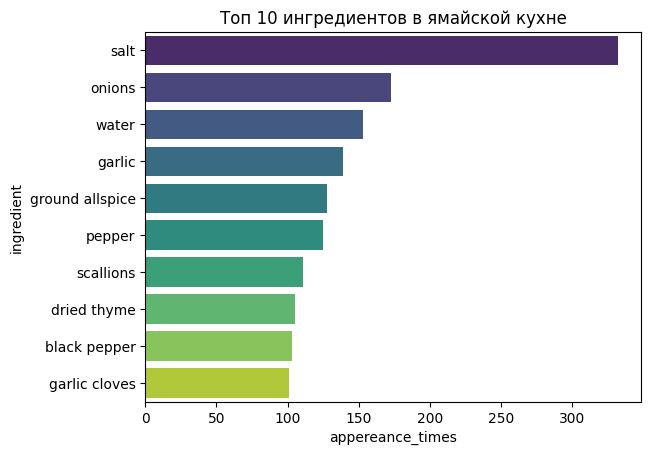

In [29]:
jamaican_ingredients = df[df['cuisine'] == 'jamaican']\
    .drop(columns=['id', 'cuisine'])\
    .sum(axis=0)\
    .sort_values(ascending=False)\
    .head(10)\
    .reset_index()\
    .rename(columns={'index': 'ingredient', 0: 'appereance_times'})
plt.title('Топ 10 ингредиентов в ямайской кухне')
sns.barplot(data=jamaican_ingredients, x='appereance_times', y='ingredient', palette='viridis');

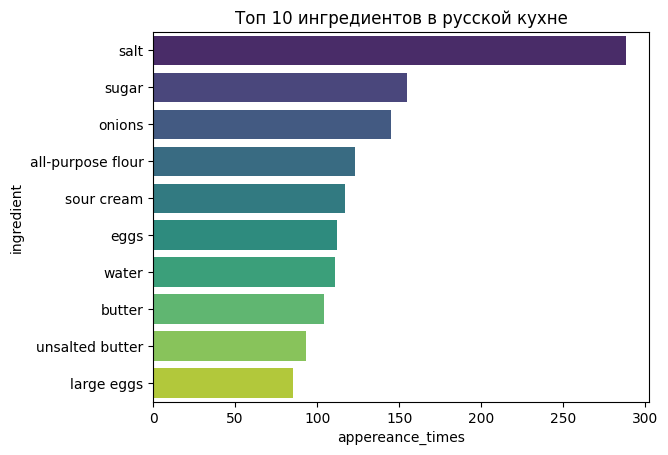

In [30]:
russian_ingredients = df[df['cuisine'] == 'russian']\
    .drop(columns=['id', 'cuisine'])\
    .sum(axis=0)\
    .sort_values(ascending=False)\
    .head(10)\
    .reset_index()\
    .rename(columns={'index': 'ingredient', 0: 'appereance_times'})
plt.title('Топ 10 ингредиентов в русской кухне')
sns.barplot(data=russian_ingredients, x='appereance_times', y='ingredient', palette='viridis');

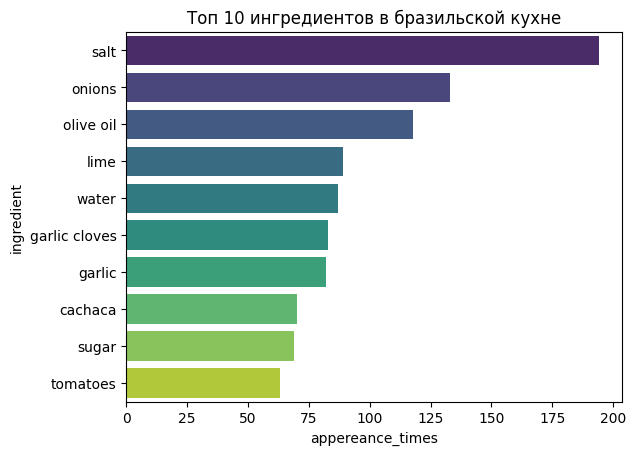

In [31]:
brazilian_ingredients = df[df['cuisine'] == 'brazilian']\
    .drop(columns=['id', 'cuisine'])\
    .sum(axis=0)\
    .sort_values(ascending=False)\
    .head(10)\
    .reset_index()\
    .rename(columns={'index': 'ingredient', 0: 'appereance_times'})
plt.title('Топ 10 ингредиентов в бразильской кухне')
sns.barplot(data=brazilian_ingredients, x='appereance_times', y='ingredient', palette='viridis');

Интересно заметить, что в японской и китайской кухне топ 1 ингридинет - соевый соус, в то время как в большинстве стран это соль. 

## Разделение данных на train & test samples

In [32]:
df

,id,cuisine,whole cloves,Pale Ale,frozen petit pois,grain alcohol,sichuanese chili paste,fresh yeast,salt,flour tortillas (not low fat),...,Domino Light Brown Sugar,kefalotyri,pear tomatoes,bottom round roast,boiled eggs,flowering garlic chives,fruitcake,edible gold leaf,medium eggs,frozen popcorn chicken
0,10259,greek,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,irish,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
39770,11462,italian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,2238,irish,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
39772,41882,chinese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
encoder = LabelEncoder()
df['cuisine'] = encoder.fit_transform(df['cuisine'])

In [34]:
df

,id,cuisine,whole cloves,Pale Ale,frozen petit pois,grain alcohol,sichuanese chili paste,fresh yeast,salt,flour tortillas (not low fat),...,Domino Light Brown Sugar,kefalotyri,pear tomatoes,bottom round roast,boiled eggs,flowering garlic chives,fruitcake,edible gold leaf,medium eggs,frozen popcorn chicken
0,10259,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,16,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,4,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,7,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,7,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,8,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
39770,11462,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,2238,8,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
39772,41882,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
features = df.drop(columns=['id', 'cuisine'])
target = df['cuisine']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, shuffle=True, stratify=target)

In [37]:
np.bincount(y_train)

array([ 327,  563, 1082, 1871,  529, 1852,  823, 2102,  467, 5486,  368,
        996,  581, 4506,  575,  342, 3024,  692, 1077,  578], dtype=int64)

In [38]:
np.bincount(y_test)

array([ 140,  241,  464,  802,  226,  794,  352,  901,  200, 2352,  158,
        427,  249, 1932,  246,  147, 1296,  297,  462,  247], dtype=int64)

Использовали stratify, чтобы учесть неравномерность распределения target. \
Проблема заключается в том, что существует вероятность, что самые редковстречающиеся кухни не попадут в train выборку, что скажется а качестве модели, а stratify решает эту проблему. \
Видно, что всё готово для обучения.

## Обучение моделей

Для начала попробуем самую простую модель классификации на несколько классов - логистиечскую регрессию.

In [39]:
clf = LogisticRegression(n_jobs=-1)
clf.fit(X_train, y_train)
accuracy_score(clf.predict(X_test), y_test)

0.7662783876644599

Ничего себе, простейшая линейная модель мультиклассификации дала точность 0.77.

Попробуем использовать метод градиентного бустинга. Данный метод последовательно строит деревья друг за другом. 

In [40]:
clf_boosting = CatBoostClassifier(iterations=1000,
                                  loss_function='MultiClass',
                                  task_type="GPU",
                                  devices='0:1')

In [41]:
clf_boosting.fit(X_train, y_train)

Learning rate set to 0.127938
0:	learn: 2.6496138	total: 52.3ms	remaining: 52.2s
1:	learn: 2.4965412	total: 102ms	remaining: 50.7s
2:	learn: 2.3821634	total: 145ms	remaining: 48.2s
3:	learn: 2.3050973	total: 191ms	remaining: 47.5s
4:	learn: 2.2395625	total: 227ms	remaining: 45.2s
5:	learn: 2.1923905	total: 262ms	remaining: 43.4s
6:	learn: 2.1463249	total: 296ms	remaining: 41.9s
7:	learn: 2.1065153	total: 326ms	remaining: 40.4s
8:	learn: 2.0703476	total: 353ms	remaining: 38.9s
9:	learn: 2.0418828	total: 382ms	remaining: 37.8s
10:	learn: 2.0126629	total: 424ms	remaining: 38.1s
11:	learn: 1.9831002	total: 462ms	remaining: 38.1s
12:	learn: 1.9619035	total: 492ms	remaining: 37.4s
13:	learn: 1.9466593	total: 517ms	remaining: 36.4s
14:	learn: 1.9299654	total: 543ms	remaining: 35.7s
15:	learn: 1.9144518	total: 574ms	remaining: 35.3s
16:	learn: 1.8995522	total: 597ms	remaining: 34.5s
17:	learn: 1.8815262	total: 630ms	remaining: 34.4s
18:	learn: 1.8680752	total: 653ms	remaining: 33.7s
19:	learn:

162:	learn: 1.2479382	total: 4.55s	remaining: 23.4s
163:	learn: 1.2458340	total: 4.58s	remaining: 23.3s
164:	learn: 1.2436277	total: 4.61s	remaining: 23.3s
165:	learn: 1.2424096	total: 4.63s	remaining: 23.3s
166:	learn: 1.2410862	total: 4.66s	remaining: 23.2s
167:	learn: 1.2379701	total: 4.69s	remaining: 23.2s
168:	learn: 1.2366697	total: 4.71s	remaining: 23.2s
169:	learn: 1.2353931	total: 4.73s	remaining: 23.1s
170:	learn: 1.2339798	total: 4.76s	remaining: 23.1s
171:	learn: 1.2321302	total: 4.79s	remaining: 23.1s
172:	learn: 1.2303620	total: 4.82s	remaining: 23s
173:	learn: 1.2283141	total: 4.84s	remaining: 23s
174:	learn: 1.2272834	total: 4.87s	remaining: 22.9s
175:	learn: 1.2264780	total: 4.89s	remaining: 22.9s
176:	learn: 1.2256304	total: 4.91s	remaining: 22.8s
177:	learn: 1.2230494	total: 4.94s	remaining: 22.8s
178:	learn: 1.2210092	total: 4.97s	remaining: 22.8s
179:	learn: 1.2195930	total: 5s	remaining: 22.8s
180:	learn: 1.2184788	total: 5.02s	remaining: 22.7s
181:	learn: 1.21705

323:	learn: 1.0587212	total: 8.69s	remaining: 18.1s
324:	learn: 1.0571351	total: 8.72s	remaining: 18.1s
325:	learn: 1.0560304	total: 8.75s	remaining: 18.1s
326:	learn: 1.0552386	total: 8.78s	remaining: 18.1s
327:	learn: 1.0545600	total: 8.8s	remaining: 18s
328:	learn: 1.0540963	total: 8.82s	remaining: 18s
329:	learn: 1.0535841	total: 8.85s	remaining: 18s
330:	learn: 1.0530863	total: 8.87s	remaining: 17.9s
331:	learn: 1.0522126	total: 8.89s	remaining: 17.9s
332:	learn: 1.0513931	total: 8.92s	remaining: 17.9s
333:	learn: 1.0509971	total: 8.94s	remaining: 17.8s
334:	learn: 1.0503778	total: 8.96s	remaining: 17.8s
335:	learn: 1.0493702	total: 8.99s	remaining: 17.8s
336:	learn: 1.0488943	total: 9.02s	remaining: 17.7s
337:	learn: 1.0478355	total: 9.04s	remaining: 17.7s
338:	learn: 1.0474287	total: 9.07s	remaining: 17.7s
339:	learn: 1.0466872	total: 9.09s	remaining: 17.6s
340:	learn: 1.0462557	total: 9.11s	remaining: 17.6s
341:	learn: 1.0458556	total: 9.14s	remaining: 17.6s
342:	learn: 1.04472

490:	learn: 0.9608275	total: 12.8s	remaining: 13.3s
491:	learn: 0.9603146	total: 12.9s	remaining: 13.3s
492:	learn: 0.9596655	total: 12.9s	remaining: 13.3s
493:	learn: 0.9593107	total: 12.9s	remaining: 13.2s
494:	learn: 0.9586737	total: 12.9s	remaining: 13.2s
495:	learn: 0.9577833	total: 13s	remaining: 13.2s
496:	learn: 0.9573589	total: 13s	remaining: 13.2s
497:	learn: 0.9570421	total: 13s	remaining: 13.1s
498:	learn: 0.9564434	total: 13s	remaining: 13.1s
499:	learn: 0.9561482	total: 13.1s	remaining: 13.1s
500:	learn: 0.9559928	total: 13.1s	remaining: 13s
501:	learn: 0.9553267	total: 13.1s	remaining: 13s
502:	learn: 0.9549264	total: 13.1s	remaining: 13s
503:	learn: 0.9543547	total: 13.2s	remaining: 13s
504:	learn: 0.9540891	total: 13.2s	remaining: 12.9s
505:	learn: 0.9534612	total: 13.2s	remaining: 12.9s
506:	learn: 0.9528800	total: 13.2s	remaining: 12.9s
507:	learn: 0.9525053	total: 13.3s	remaining: 12.9s
508:	learn: 0.9518244	total: 13.3s	remaining: 12.8s
509:	learn: 0.9514681	total:

656:	learn: 0.9049332	total: 16.8s	remaining: 8.79s
657:	learn: 0.9044614	total: 16.9s	remaining: 8.76s
658:	learn: 0.9041524	total: 16.9s	remaining: 8.74s
659:	learn: 0.9040295	total: 16.9s	remaining: 8.71s
660:	learn: 0.9036957	total: 16.9s	remaining: 8.68s
661:	learn: 0.9036390	total: 16.9s	remaining: 8.65s
662:	learn: 0.9031136	total: 17s	remaining: 8.63s
663:	learn: 0.9029109	total: 17s	remaining: 8.6s
664:	learn: 0.9022573	total: 17s	remaining: 8.58s
665:	learn: 0.9015544	total: 17.1s	remaining: 8.55s
666:	learn: 0.9011533	total: 17.1s	remaining: 8.53s
667:	learn: 0.9007396	total: 17.1s	remaining: 8.5s
668:	learn: 0.9004356	total: 17.1s	remaining: 8.48s
669:	learn: 0.8999927	total: 17.2s	remaining: 8.45s
670:	learn: 0.8998431	total: 17.2s	remaining: 8.42s
671:	learn: 0.8994381	total: 17.2s	remaining: 8.4s
672:	learn: 0.8992869	total: 17.2s	remaining: 8.37s
673:	learn: 0.8987561	total: 17.3s	remaining: 8.35s
674:	learn: 0.8986397	total: 17.3s	remaining: 8.32s
675:	learn: 0.8984573

822:	learn: 0.8636074	total: 20.8s	remaining: 4.47s
823:	learn: 0.8633744	total: 20.8s	remaining: 4.44s
824:	learn: 0.8633418	total: 20.8s	remaining: 4.42s
825:	learn: 0.8632128	total: 20.9s	remaining: 4.39s
826:	learn: 0.8631411	total: 20.9s	remaining: 4.37s
827:	learn: 0.8630758	total: 20.9s	remaining: 4.34s
828:	learn: 0.8629102	total: 20.9s	remaining: 4.32s
829:	learn: 0.8625902	total: 20.9s	remaining: 4.29s
830:	learn: 0.8622068	total: 21s	remaining: 4.26s
831:	learn: 0.8619085	total: 21s	remaining: 4.24s
832:	learn: 0.8616495	total: 21s	remaining: 4.21s
833:	learn: 0.8616257	total: 21s	remaining: 4.19s
834:	learn: 0.8615474	total: 21.1s	remaining: 4.16s
835:	learn: 0.8613288	total: 21.1s	remaining: 4.14s
836:	learn: 0.8611671	total: 21.1s	remaining: 4.11s
837:	learn: 0.8609710	total: 21.1s	remaining: 4.08s
838:	learn: 0.8609207	total: 21.2s	remaining: 4.06s
839:	learn: 0.8606404	total: 21.2s	remaining: 4.03s
840:	learn: 0.8602438	total: 21.2s	remaining: 4.01s
841:	learn: 0.859762

989:	learn: 0.8346582	total: 24.7s	remaining: 249ms
990:	learn: 0.8344244	total: 24.7s	remaining: 224ms
991:	learn: 0.8343791	total: 24.7s	remaining: 199ms
992:	learn: 0.8342022	total: 24.8s	remaining: 175ms
993:	learn: 0.8341764	total: 24.8s	remaining: 150ms
994:	learn: 0.8341361	total: 24.8s	remaining: 125ms
995:	learn: 0.8340665	total: 24.8s	remaining: 99.7ms
996:	learn: 0.8339885	total: 24.8s	remaining: 74.8ms
997:	learn: 0.8339240	total: 24.9s	remaining: 49.8ms
998:	learn: 0.8336724	total: 24.9s	remaining: 24.9ms
999:	learn: 0.8336297	total: 24.9s	remaining: 0us


In [42]:
accuracy_score(clf_boosting.predict(X_test), y_test)

0.7310818737953574

Метод градиентного бустинга дал точность 0.73, что хуже чем у простейшей логистической регрессии.

Также попробуем метод K ближайших соседей c полным перебором гиперпараметров, где количество соседей в списке [1, 2, 3, 4, 5, 10].

In [43]:
clf_neigboors = KNeighborsClassifier()
grid_clf = GridSearchCV(clf_neigboors, param_grid={'n_neighbors': [1, 2, 3, 4, 5, 10]}, n_jobs=-1)
grid_clf.fit(X_train.values, y_train.values)
clf_neigboors = grid_clf.best_estimator_
accuracy_score(clf_neigboors.predict(X_test.values), y_test.values)

0.5164669404173301

In [44]:
grid_clf.best_params_

{'n_neighbors': 10}

Метод KNN дал accuracy 0.5, что является худшим результатом.

## Выводы

В результате предобработки, анализа данных и обучения моделей были получены три модели мультиклассификации.\
Логистическая регрессия дала лучший score = 0.77 \
Метод градиентного бустинга, несмотря на то, что данный метод является более продвинутым чем логистиеческая регрессия дал score = 0.73, что хуже чем у регрессии. \
Метод K ближайших соседей дал score = 0.52, что является худшим результатом из всех трёх моделей.